## Mall Customer Segmentation - Understanding the Data

Let's put ourselves in the shoes of the marketing manager of an e-commerce company with a base of 1 million transacting customers. We want to make our marketing campaigns more effective, reaching the right customer with the right messaging and offers. We know that by understanding the customer and their needs better, marketing campaigns could provide a significant boost to the business revenue. As we begin looking at this problem, we think about the customer experience. On average, our customer receives several communications from our platform about the latest offers and programs. These could be relayed via email, push notifications, social media campaigns and others. This may not be a great experience for them, especially if these communications are generic and/or mass campaigns. If the company understood the customers' needs better and sent them the relevant content, they would shop much more frequently.

Deep understanding of customers and their needs is beneficial not only to the company but also to the customer. If we are a small company, understanding the needs of all the customers is as easy as running a quick survey. However, for a company with a large user base with millions of customers, understanding their needs would be extremely difficult, given each customer will have their own different tastes and needs. Moreover, with customers from different backgrounds, cultures, and age groups, this problem becomes even more difficult to solve.

Things would be a little bit easier if the task could be simplified by condensing our customers into a few groups. Instead of dealing with a million customers, would it not be
easier to deal with, say, five types of customers? Customer segmentation lets you do just that – abstract potentially millions of customers to a few segments or groups and understand their characteristics and needs. With such understanding, the impact you we realize is tremendous. We can send more directed and targeted messaging through marketing campaigns, offer differential services, make better product recommendations, and more to make the overall customer experience better. All this could lead to a significant business impact – not just an immediate revenue impact through more efficient marketing campaigns, but also a significant positive impact on the long-term value that customers bring to the platform.

# Segmentation

Segmentation, simply means grouping similar entities together. The entities of each group are similar to each other, that is, "the groups are homogenous within and heterogenous without," meaning
the entities have similar properties within a group, but the groups are as different as possible. We need to make distinctions between two key aspects here – *entities* and *properties*.

So what can be segmented? You can segment customers, products, offers, etc. If the properties of the entity can be expressed, that entity can be compared to other entities and segment
it. Here, we'll focus on customer segmentation – that is, grouping and segmenting customers, an exercise that has tremendous utility in business.

In general customer segmentation exercise involves the following key steps:

1. Choosing the relevant attributes for the entities
2. Clustering/grouping the entities
3. Understanding and describing the segments * as per the business requirements *

The segments determined as a result of this activity should make sense to the business and be actionable. Business stakeholders, play a critical role of the "human in the loop," must be able to understand these segments. Then with their feedback, these segments can be refined further, making them even more actionable and business-driven. The marketing team can then readily understand and leverage them to create a successful marketing campaign. That's why step 3 above is very critical.

Let's get our hands dirty by playinh around with some data. We'll start by preparing our data for segmentation.
Our data has attributes of customers who visited a mall

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
MallCustomers = pd.read_csv("./Mall_Customers.csv")
MallCustomers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
MallCustomers.info() # the info() method of a Dataframe prints some metadata about it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Fortunately, this particular dataset is a relatively clean one, that doesn't have missing values or poorly formated data.
Having said that, we will still need to rename some of the columns and assign names that are more meaningful and short.

#### Renaming columns

In [4]:
# Let's rename some variables for convience

MallCustomers.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
             
MallCustomers.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Let's get a descriptive summary of our data

MallCustomers.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## High level understanding of the data

Looking at output, the average age of the customer is approximately 39 and their average income is around 61,500 USD. The spend scores seem to be calculated based on percentiles – having a minimum value of 1 and a maximum of 99. The highest earning customer rakes in 137 USD. By looking at the values, we do not have any reason to suspect that outliers are present in the data.

## Traditional Segmentation of Mall Customers

We want to segment our customers and plans to use the derived segments to improve our marketing campaigns. Our business team believes that segmenting based on income levels is relevant for their offerings. We are asked to use a traditional, rule-based approach to define the customer segments.

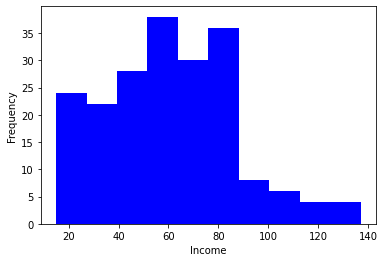

In [6]:
MallCustomers.Income.plot.hist(color='blue')
plt.xlabel('Income')
plt.show()

From the plot above, we can see that we have more than one peek, giving an indication that there might be more than one distinct groups/clusters of customers.

Let's create a new column ‘Cluster’ to have the values ‘Low Income’, ‘Moderate Income’, ‘High earners’ for customers with income in the ranges < 50, 50 – 90, and >= 90 respectively, using the code below.

In [7]:
MallCustomers['Cluster'] = np.where(MallCustomers.Income >= 90, 'High earners', \
                            np.where(MallCustomers.Income < 50, \
                            'Low Income', 'Moderate Income'))

In [8]:
# We will use the groupby method and decribe on each cluster to get a summary of the cluster characteristics

MallCustomers.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0
